In [34]:
import pandas as pd
import numpy as np

df = pd.read_excel("2024 January- March.xls", 
                   sheet_name="Turbine3",
                   skiprows=9)   # drop the first 9 rows (Excel header)

In [35]:
new_cols = df.iloc[0]
df.columns = new_cols

df = df.iloc[:, 7:]
df = df.drop(index=0).reset_index(drop=True)
df = df.drop(columns=df.columns[df.columns.isna()])
df.head(10)

,Date,Act. Pwr. Avg. 10M (kW),Air Temp. Avg. 10M (ºC),Nacelle Posit. Avg. 10M (º),Wind speed Avg. 10M (m/s)
0,2024-01-01 00:00:00,434.388,23.93,22,5.988
1,2024-01-01 00:10:00,416.317,23.937,24,5.863
2,2024-01-01 00:20:00,392.223,23.941,30,5.716
3,2024-01-01 00:30:00,543.23,23.962,35,6.32
4,2024-01-01 00:40:00,530.749,23.936,36,6.325
5,2024-01-01 00:50:00,511.547,23.874,32,6.232
6,2024-01-01 01:00:00,826.984,23.722,26,7.203
7,2024-01-01 01:10:00,900.002,23.661,26,7.414
8,2024-01-01 01:20:00,767.597,23.765,26,7.044
9,2024-01-01 01:30:00,717.941,23.81,26,6.794


In [36]:
df = df.astype({
    "Act. Pwr. Avg. 10M (kW)" : "float64",
    "Air Temp. Avg. 10M (ºC)" : "float64",
    "Nacelle Posit. Avg. 10M (º)" : "Int64",
    "Wind speed Avg. 10M (m/s)" : "float64"
})

df["Date"] = pd.to_datetime(df["Date"], errors="raise")

df.dtypes

0
Date                           datetime64[ns]
Act. Pwr. Avg. 10M (kW)               float64
Air Temp. Avg. 10M (ºC)               float64
Nacelle Posit. Avg. 10M (º)             Int64
Wind speed Avg. 10M (m/s)             float64
dtype: object

In [37]:
# lowercase, strip whitespace, replace spaces and non-alphanumerics with _
def clean_cols(dataf):
    return dataf.columns.str.strip().str.lower().str.replace(r"[.\s/()º%]+", "_", regex=True).str.strip("_")
      
df.columns = clean_cols(df)
df.columns

Index(['date', 'act_pwr_avg_10m_kw', 'air_temp_avg_10m_c',
       'nacelle_posit_avg_10m', 'wind_speed_avg_10m_m_s'],
      dtype='object', name=0)

In [38]:
df.head(10)

,date,act_pwr_avg_10m_kw,air_temp_avg_10m_c,nacelle_posit_avg_10m,wind_speed_avg_10m_m_s
0,2024-01-01 00:00:00,434.388,23.930,22,5.988
1,2024-01-01 00:10:00,416.317,23.937,24,5.863
2,2024-01-01 00:20:00,392.223,23.941,30,5.716
3,2024-01-01 00:30:00,543.230,23.962,35,6.320
4,2024-01-01 00:40:00,530.749,23.936,36,6.325
5,2024-01-01 00:50:00,511.547,23.874,32,6.232
6,2024-01-01 01:00:00,826.984,23.722,26,7.203
7,2024-01-01 01:10:00,900.002,23.661,26,7.414
8,2024-01-01 01:20:00,767.597,23.765,26,7.044
9,2024-01-01 01:30:00,717.941,23.810,26,6.794


In [39]:
df.describe()

,date,act_pwr_avg_10m_kw,air_temp_avg_10m_c,nacelle_posit_avg_10m,wind_speed_avg_10m_m_s
count,6116,6116.000000,6116.000000,6114.0,6116.000000
mean,2024-02-08 13:18:21.798561024,322.444516,25.138573,72.11629,5.578507
min,2024-01-01 00:00:00,-54.457100,0.000000,0.0,0.000000
25%,2024-01-12 22:07:30,87.077000,23.868000,3.0,4.651000
50%,2024-01-24 02:45:00,265.532000,25.032000,36.0,5.709000
75%,2024-03-19 16:42:30,481.571250,26.203250,59.0,6.631000
max,2024-03-31 23:50:00,1895.262000,30.136000,360.0,12.245000
std,NaN,289.938888,1.791065,106.712969,1.496243


In [40]:
# corr = df.drop(columns="date").corr()
# sns.heatmap(corr, annot=True, fmt=".2f")

In [41]:
# from pandas.plotting import scatter_matrix
# scatter_matrix(df.drop(columns="date"), figsize=(8,8), diagonal="kde")

In [42]:
df_2 = pd.read_excel("2024 April- June.xls", 
                   sheet_name="Turbine3",
                   skiprows=1)   # drop the first row (blank)

In [43]:
df_2 = df_2.iloc[:, 7:]
df_2 = df_2.drop(index=0).reset_index(drop=True)
df_2 = df_2.drop(columns=df_2.columns[df_2.columns.isna()])
#df_2 = df_2.dropna(axis=1)

df_2.head(10)

,Date,Unnamed: 8,Act. Pwr. Avg. 10M (kW),Unnamed: 10,Air Temp. Avg. 10M (ºC),Unnamed: 12,Nacelle Posit. Avg. 10M (º),Unnamed: 14,Wind speed Avg. 10M (m/s)
0,2024-04-01 00:10:00,NaN,110.527,NaN,27.174,NaN,79.0,NaN,4.485
1,2024-04-01 00:20:00,NaN,97.685,NaN,27.279,NaN,79.0,NaN,4.594
2,2024-04-01 00:30:00,NaN,123.299,NaN,27.081,NaN,79.0,NaN,4.915
3,2024-04-01 00:40:00,NaN,99.190,NaN,26.930,NaN,79.0,NaN,4.568
4,2024-04-01 00:50:00,NaN,100.038,NaN,26.844,NaN,79.0,NaN,4.527
5,2024-04-01 01:00:00,NaN,179.117,NaN,26.895,NaN,86.0,NaN,5.177
6,2024-04-01 01:10:00,NaN,27.851,NaN,26.723,NaN,92.0,NaN,3.697
7,2024-04-01 01:20:00,NaN,59.276,NaN,26.658,NaN,98.0,NaN,3.840
8,2024-04-01 01:30:00,NaN,71.954,NaN,26.601,NaN,106.0,NaN,4.104
9,2024-04-01 01:40:00,NaN,121.241,NaN,26.622,NaN,106.0,NaN,4.678


In [44]:
rows_with_nan = df_2.isna().any()
print(rows_with_nan)

Date                           False
Unnamed: 8                      True
Act. Pwr. Avg. 10M (kW)        False
Unnamed: 10                     True
Air Temp. Avg. 10M (ºC)        False
Unnamed: 12                     True
Nacelle Posit. Avg. 10M (º)     True
Unnamed: 14                     True
Wind speed Avg. 10M (m/s)      False
dtype: bool


In [45]:
# Fill NaNs with the previous row's value
df_2['Nacelle Posit. Avg. 10M (º)'] = df_2['Nacelle Posit. Avg. 10M (º)'].ffill()
#print(df_2[df_2['Nacelle Posit. Avg. 10M (º)'].isna()][['Nacelle Posit. Avg. 10M (º)']])
rows_with_nan = df_2.isna().any()
print(rows_with_nan)


Date                           False
Unnamed: 8                      True
Act. Pwr. Avg. 10M (kW)        False
Unnamed: 10                     True
Air Temp. Avg. 10M (ºC)        False
Unnamed: 12                     True
Nacelle Posit. Avg. 10M (º)    False
Unnamed: 14                     True
Wind speed Avg. 10M (m/s)      False
dtype: bool


In [46]:
df_2 = df_2.dropna(axis=1)

df_2.columns = clean_cols(df_2)

df_2.columns

df_2 = df_2.astype({
    "nacelle_posit_avg_10m" : "Int64"
})

df_2.dtypes

date                      datetime64[ns]
act_pwr_avg_10m_kw               float64
air_temp_avg_10m_c               float64
nacelle_posit_avg_10m              Int64
wind_speed_avg_10m_m_s           float64
dtype: object

In [47]:
df_3 = pd.read_excel("2024 July- August.xls", 
                   sheet_name="turbine 3",
                   skiprows=1)   # drop the first row (blank)

df_3 = df_3.iloc[:, 7:]
df_3 = df_3.drop(index=0).reset_index(drop=True)
df_3 = df_3.drop(columns=df_2.columns[df_2.columns.isna()])
#df_2 = df_2.dropna(axis=1)

df_3.head(10)

,Date,Unnamed: 8,Act. Pwr. Avg. 10M (kW),Unnamed: 10,Air Temp. Avg. 10M (ºC),Unnamed: 12,Nacelle Posit. Avg. 10M (º),Unnamed: 14,Wind speed Avg. 10M (m/s)
0,2024-07-01 00:10:00,NaN,645.2720,NaN,27.070,NaN,333,NaN,6.923
1,2024-07-01 00:20:00,NaN,928.1150,NaN,27.000,NaN,333,NaN,7.584
2,2024-07-01 00:30:00,NaN,787.6410,NaN,27.000,NaN,333,NaN,7.462
3,2024-07-01 00:40:00,NaN,1073.0740,NaN,27.010,NaN,333,NaN,8.111
4,2024-07-01 00:50:00,NaN,1093.4821,NaN,27.044,NaN,333,NaN,8.137
5,2024-07-01 01:00:00,NaN,1139.2720,NaN,27.061,NaN,333,NaN,8.246
6,2024-07-01 01:10:00,NaN,875.1530,NaN,26.896,NaN,340,NaN,7.503
7,2024-07-01 01:20:00,NaN,968.0210,NaN,26.876,NaN,340,NaN,7.715
8,2024-07-01 01:30:00,NaN,1500.2240,NaN,26.958,NaN,340,NaN,9.124
9,2024-07-01 01:40:00,NaN,981.3210,NaN,26.949,NaN,340,NaN,7.778


In [48]:
rows_with_nan = df_3.isna().any()
print(rows_with_nan)

Date                           False
Unnamed: 8                      True
Act. Pwr. Avg. 10M (kW)        False
Unnamed: 10                     True
Air Temp. Avg. 10M (ºC)        False
Unnamed: 12                     True
Nacelle Posit. Avg. 10M (º)    False
Unnamed: 14                     True
Wind speed Avg. 10M (m/s)      False
dtype: bool


In [49]:
df_3 = df_3.dropna(axis=1)
df_3.columns = clean_cols(df_3)

df_3.dtypes

date                      datetime64[ns]
act_pwr_avg_10m_kw               float64
air_temp_avg_10m_c               float64
nacelle_posit_avg_10m              int64
wind_speed_avg_10m_m_s           float64
dtype: object

In [50]:
# corr_2 = df_2.drop(columns="date").corr()
# sns.heatmap(corr_2, annot=True, fmt=".2f")

In [51]:
# corr_3 = df_3.drop(columns="date").corr()
# sns.heatmap(corr_3, annot=True, fmt=".2f")

In [52]:
df.describe()

,date,act_pwr_avg_10m_kw,air_temp_avg_10m_c,nacelle_posit_avg_10m,wind_speed_avg_10m_m_s
count,6116,6116.000000,6116.000000,6114.0,6116.000000
mean,2024-02-08 13:18:21.798561024,322.444516,25.138573,72.11629,5.578507
min,2024-01-01 00:00:00,-54.457100,0.000000,0.0,0.000000
25%,2024-01-12 22:07:30,87.077000,23.868000,3.0,4.651000
50%,2024-01-24 02:45:00,265.532000,25.032000,36.0,5.709000
75%,2024-03-19 16:42:30,481.571250,26.203250,59.0,6.631000
max,2024-03-31 23:50:00,1895.262000,30.136000,360.0,12.245000
std,NaN,289.938888,1.791065,106.712969,1.496243


In [53]:
df_2.describe()

,date,act_pwr_avg_10m_kw,air_temp_avg_10m_c,nacelle_posit_avg_10m,wind_speed_avg_10m_m_s
count,12402,12402.000000,12402.000000,12402.0,12402.000000
mean,2024-05-16 21:23:52.801161216,520.148828,27.392837,151.515965,6.182020
min,2024-04-01 00:10:00,-21.064000,0.000000,0.0,0.000000
25%,2024-04-24 10:02:30,66.968250,26.684000,38.0,4.164250
50%,2024-05-17 03:25:00,376.709000,27.267000,161.0,6.256000
75%,2024-06-08 12:27:30,940.787750,28.402750,229.0,8.076000
max,2024-06-30 23:50:00,1992.808000,32.600000,360.0,13.961000
std,NaN,489.718423,1.703058,102.960742,2.474929


In [54]:
df_3.describe()

,date,act_pwr_avg_10m_kw,air_temp_avg_10m_c,nacelle_posit_avg_10m,wind_speed_avg_10m_m_s
count,2341,2341.000000,2341.000000,2341.000000,2341.000000
mean,2024-07-18 03:47:06.997009664,1106.491285,29.001019,186.077317,8.393103
min,2024-07-01 00:10:00,-12.900000,5.250000,0.000000,1.566700
25%,2024-07-05 08:40:00,801.835000,27.351000,10.000000,7.570600
50%,2024-07-22 19:30:00,1151.533000,29.826000,317.000000,8.381000
75%,2024-07-26 23:00:00,1489.967000,30.278000,338.000000,9.260000
max,2024-07-31 09:20:00,1807.700000,31.211000,360.000000,12.847000
std,NaN,447.487749,1.727143,164.179609,1.212286


In [55]:
# df["act_pwr_avg_10m_kw"].plot(title="Active Power over Time")

In [56]:
# df_2["act_pwr_avg_10m_kw"].plot(title="Active Power over Time")

In [57]:
# df_3["act_pwr_avg_10m_kw"].plot(title="Active Power over Time")

In [58]:
# --- 1. Concatenate and time-index ----------------------------------------
df_all = (
    pd.concat([df, df_2, df_3], axis=0, ignore_index=True)
      .assign(date=lambda d: pd.to_datetime(d["date"]))
      .sort_values("date")
      .set_index("date")
)

# --- 2. Basic sanity checks ----------------------------------------------
assert df_all.index.is_monotonic_increasing, "Time index is not sorted."
assert df_all.index.freq is None, "Pandas freq field set? If not, that's fine."

# --- 3. Minimal season-aware feature engineering -------------------------
# Day-of-year (annual cycle) and hour-of-day (diurnal cycle)
doy  = df_all.index.dayofyear
hod  = df_all.index.hour + df_all.index.minute / 60

df_all["sin_doy"]   = np.sin(2*np.pi * doy / 365.25)
df_all["cos_doy"]   = np.cos(2*np.pi * doy / 365.25)
df_all["sin_hod"]   = np.sin(2*np.pi * hod / 24)
df_all["cos_hod"]   = np.cos(2*np.pi * hod / 24)

# Interaction terms that let a *linear* learner flip the temp slope
df_all["temp_x_sin"] = df_all["air_temp_avg_10m_c"] * df_all["sin_doy"]
df_all["temp_x_cos"] = df_all["air_temp_avg_10m_c"] * df_all["cos_doy"]

# === PLACE THIS *right after* the block where you already made sin_doy,
#     cos_doy, etc. (i.e. after step 3, before step 4) ===============

# ------------------------------------------------
# 3-bis.  Lag features (persistence)
# ------------------------------------------------
LAGS_10MIN = [1, 6, 36]          # 10 min, 1 h, 6 h
for lag in LAGS_10MIN:
    df_all[f"wind_lag{lag}"] = df_all["wind_speed_avg_10m_m_s"].shift(lag)
    df_all[f"temp_lag{lag}"] = df_all["air_temp_avg_10m_c"].shift(lag)

# ------------------------------------------------
# 3-ter.  Physical power-curve proxy
# ------------------------------------------------
df_all["wind_cubed"] = df_all["wind_speed_avg_10m_m_s"] ** 3

# ------------------------------------------------
# 3-quat.  Rolling statistics (local regime)
# ------------------------------------------------
ROLL = 6 * 24                     # 1-day window in 10-min steps
df_all["wind_roll_mean"] = (
    df_all["wind_speed_avg_10m_m_s"].rolling(ROLL).mean().bfill()
)
df_all["wind_roll_std"] = (
    df_all["wind_speed_avg_10m_m_s"].rolling(ROLL).std().bfill()
)

# ------------------------------------------------
# 3-quin.  Remove the first max(lag) rows that are NaN
# ------------------------------------------------
df_all = df_all.dropna(axis=0, how="any")    # simplest; preserves chronology

# -------------------------------------------------------------------
# 4. Train / test split (July is the test month now)
# -------------------------------------------------------------------
mask_test = (df_all.index.month == 7)      # July, not August
df_test   = df_all.loc[mask_test]
df_train  = df_all.loc[~mask_test]

X_train = df_train.drop(columns="act_pwr_avg_10m_kw")
y_train = df_train["act_pwr_avg_10m_kw"]
X_test  = df_test.drop(columns="act_pwr_avg_10m_kw")
y_test  = df_test["act_pwr_avg_10m_kw"]

In [59]:
X_train.head(10)

,air_temp_avg_10m_c,nacelle_posit_avg_10m,wind_speed_avg_10m_m_s,sin_doy,cos_doy,sin_hod,cos_hod,temp_x_sin,temp_x_cos,wind_lag1,temp_lag1,wind_lag6,temp_lag6,wind_lag36,temp_lag36,wind_cubed,wind_roll_mean,wind_roll_std
date,,,,,,,,,,,,,,,,,,
2024-01-01 06:00:00,24.0930,16,7.1190,0.017202,0.999852,1.000000,6.123234e-17,0.414438,24.089435,7.4720,24.0670,6.7950,23.8500,5.988,23.930,360.792066,6.388594,1.295141
2024-01-01 06:10:00,24.1060,16,6.9040,0.017202,0.999852,0.999048,-4.361939e-02,0.414661,24.102433,7.1190,24.0930,7.1000,23.9220,5.863,23.937,329.080651,6.388594,1.295141
2024-01-01 06:20:00,24.1314,16,6.9919,0.017202,0.999852,0.996195,-8.715574e-02,0.415098,24.127830,6.9040,24.1060,6.8890,23.9500,5.716,23.941,341.810677,6.388594,1.295141
2024-01-01 06:40:00,23.0318,13,6.8918,0.017202,0.999852,0.984808,-1.736482e-01,0.396183,23.028392,6.9919,24.1314,6.9210,24.0130,6.320,23.962,327.339185,6.388594,1.295141
2024-01-01 06:50:00,24.1000,15,6.9530,0.017202,0.999852,0.976296,-2.164396e-01,0.414558,24.096434,6.8918,23.0318,6.7440,24.0240,6.325,23.936,336.137285,6.388594,1.295141
2024-01-01 07:00:00,24.1410,15,6.6750,0.017202,0.999852,0.965926,-2.588190e-01,0.415263,24.137428,6.9530,24.1000,7.4720,24.0670,6.232,23.874,297.408797,6.388594,1.295141
2024-01-01 07:10:00,24.0450,15,6.5240,0.017202,0.999852,0.953717,-3.007058e-01,0.413612,24.041442,6.6750,24.1410,7.1190,24.0930,7.203,23.722,277.678246,6.388594,1.295141
2024-01-01 07:20:00,23.9900,15,6.9600,0.017202,0.999852,0.939693,-3.420201e-01,0.412666,23.986450,6.5240,24.0450,6.9040,24.1060,7.414,23.661,337.153536,6.388594,1.295141
2024-01-01 07:30:00,24.0380,15,6.8280,0.017202,0.999852,0.923880,-3.826834e-01,0.413491,24.034443,6.9600,23.9900,6.9919,24.1314,7.044,23.765,318.332176,6.388594,1.295141


In [60]:
X_train.ffill(inplace=True)

In [61]:
y_train.head(10)

date
2024-01-01 06:00:00    791.4160
2024-01-01 06:10:00    735.4650
2024-01-01 06:20:00    787.4233
2024-01-01 06:40:00    499.6577
2024-01-01 06:50:00    730.9930
2024-01-01 07:00:00    638.1350
2024-01-01 07:10:00    582.2440
2024-01-01 07:20:00    683.6840
2024-01-01 07:30:00    668.3590
2024-01-01 07:40:00    756.3612
Name: act_pwr_avg_10m_kw, dtype: float64

In [62]:
# --- 0. Imports -----------------------------------------------------------
import numpy as np
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# -------------------------------------------------------------------
# 5. Walk-forward CV with *automatic* n_splits
# -------------------------------------------------------------------
DAYS_VAL  = 7                       # 1-week rolling validation
VAL_SIZE  = DAYS_VAL * 24 * 6       # 10-min data

# include July 1-23 in training, 24-30 in final CV fold,
# keep July 31 as unseen test if you want, or last 3 days, etc.
n_splits  = 4
tscv      = TimeSeriesSplit(n_splits=n_splits, test_size=VAL_SIZE)

# print(f"{len(X_train)=},  {SAMPLES_PER_MONTH=},  {n_splits=}")
# # e.g. len(X_train)=16539, SAMPLES_PER_MONTH=4320, n_splits=3

# tscv = TimeSeriesSplit(n_splits=n_splits,
#                        test_size=SAMPLES_PER_MONTH,
#                        gap=0)

# # -------------------------------------------------------------------
# # 6. Same loop as before
# # -------------------------------------------------------------------
# for k, (idx_tr, idx_val) in enumerate(tscv.split(X_train)):
#     X_tr, X_val = X_train.iloc[idx_tr], X_train.iloc[idx_val]
#     y_tr, y_val = y_train.iloc[idx_tr], y_train.iloc[idx_val]

#     preproc = ColumnTransformer([
#         ("scale", StandardScaler(), X_tr.columns)
#     ])

#     from sklearn.linear_model import Ridge
#     model = Pipeline([
#         ("prep", preproc),
#         ("reg",  Ridge(alpha=1.0))
#     ])

#     model.fit(X_tr, y_tr)
#     rmse = np.sqrt(((model.predict(X_val) - y_val) ** 2).mean())
#     print(f"Fold {k+1}/{n_splits}:  RMSE = {rmse:,.2f} kW")

# # -------------------------------------------------------------------
# # 7. Final fit on Jan-Jun, evaluate on July
# # -------------------------------------------------------------------
# best_model = Pipeline([
#     ("prep", preproc),
#     ("reg",  Ridge(alpha=1.0))
# ]).fit(X_train, y_train)

# test_rmse = np.sqrt(((best_model.predict(X_test) - y_test) ** 2).mean())
# print(f"July hold-out RMSE = {test_rmse:,.2f} kW")

In [63]:
# import matplotlib.pyplot as plt
# import scipy.stats as stats

# # ----------------------------------------------------------
# # 1. Metrics
# # ----------------------------------------------------------
# from sklearn.metrics import mean_absolute_error, r2_score

# y_pred = best_model.predict(X_test)
# rmse   = np.sqrt(((y_pred - y_test) ** 2).mean())
# mae    = mean_absolute_error(y_test, y_pred)
# r2     = r2_score(y_test, y_pred)

# # naive persistence forecast: last observed value
# y_pers = y_test.shift(1).bfill()
# rmse_pers = np.sqrt(((y_pers - y_test) ** 2).mean())
# skill  = 1 - rmse / rmse_pers

# print(f"Hold-out July metrics:")
# print(f"  RMSE  = {rmse:,.2f} kW")
# print(f"  MAE   = {mae:,.2f} kW")
# print(f"  MAPE  = {mape:,.2f} %")
# print(f"  R²    = {r2:,.3f}")
# print(f"  Skill vs persistence = {skill:,.3f}")

# # ----------------------------------------------------------
# # 2. Predicted vs actual scatter
# # ----------------------------------------------------------
# plt.figure()
# plt.scatter(y_test, y_pred, s=3)
# plt.plot([y_test.min(), y_test.max()],
#          [y_test.min(), y_test.max()],
#          linestyle="--")
# plt.xlabel("Actual power (kW)")
# plt.ylabel("Predicted power (kW)")
# plt.title("July hold-out: Predicted vs Actual")
# plt.grid(True, linestyle=":")
# plt.tight_layout()
# plt.show()

# # ----------------------------------------------------------
# # 3. Residual histogram
# # ----------------------------------------------------------
# resid = y_test - y_pred
# plt.figure()
# plt.hist(resid, bins=50)
# plt.xlabel("Residual (kW)")
# plt.ylabel("Frequency")
# plt.title("Residual distribution (July)")
# plt.grid(True, linestyle=":")
# plt.tight_layout()
# plt.show()

# # Q-Q plot for normality
# plt.figure()
# stats.probplot(resid, dist="norm", plot=plt)
# plt.title("Residual Q-Q plot")
# plt.tight_layout()
# plt.show()

# # ----------------------------------------------------------
# # 4. Error by wind-speed bins
# # ----------------------------------------------------------
# ws = X_test["wind_speed_avg_10m_m_s"]
# bins = np.quantile(ws, np.linspace(0, 1, 11))           # deciles
# labels = [f"{round(bins[i],1)}–{round(bins[i+1],1)}"
#           for i in range(len(bins)-1)]
# ws_bin = pd.cut(ws, bins=bins, labels=labels, include_lowest=True)

# rmse_by_bin = ( (resid**2).groupby(ws_bin).mean() )**0.5

# plt.figure()
# rmse_by_bin.plot(kind="bar", rot=45)
# plt.ylabel("RMSE (kW)")
# plt.title("RMSE by wind-speed decile (July)")
# plt.grid(True, axis="y", linestyle=":")
# plt.tight_layout()
# plt.show()

In [64]:
# import numpy as np

# mask = y_test != 0
# mape = np.mean(np.abs((y_test[mask] - y_pred[mask]) / y_test[mask])) * 100

In [65]:
# print(mape)

In [66]:
# ------------------------------------------------------------------
# 0. Imports & helpers
# ------------------------------------------------------------------
import numpy as np
import pandas as pd
from sklearn.pipeline        import Pipeline
from sklearn.compose         import ColumnTransformer
from sklearn.preprocessing   import StandardScaler
from sklearn.ensemble        import RandomForestRegressor
from sklearn.metrics         import mean_squared_error, make_scorer
from sklearn.model_selection import GridSearchCV

try:
    from xgboost import XGBRegressor
    has_xgb = True
except ImportError:
    has_xgb = False
    print("XGBoost not installed – skipping.")

# custom RMSE scorer (negative for GridSearchCV)
rmse  = lambda yt, yp: np.sqrt(mean_squared_error(yt, yp))
rmse_scorer = make_scorer(lambda yt, yp: -rmse(yt, yp), greater_is_better=False)

# keep a single StandardScaler for all models
num_cols = X_train.columns
preproc  = ColumnTransformer([("scale", StandardScaler(), num_cols)])

def make_pipe(est):
    return Pipeline([("prep", preproc), ("est", est)])


# ------------------------------------------------------------------
# 1. Quick CV benchmark: Ridge vs RF vs XGB
# ------------------------------------------------------------------
from sklearn.linear_model import Ridge
candidates = {
    "ridge": Ridge(alpha=1.0),
    "rf"   : RandomForestRegressor(n_estimators=300,
                                   min_samples_leaf=10,
                                   n_jobs=-1,
                                   random_state=42)
}
if has_xgb:
    candidates["xgb"] = XGBRegressor(
        n_estimators=400,
        eta=0.05,
        max_depth=4,
        subsample=0.8,
        colsample_bytree=0.8,
        tree_method="hist",
        random_state=42
    )

cv_scores = {}
for name, est in candidates.items():
    rmses = []
    for idx_tr, idx_val in tscv.split(X_train):
        pipe = make_pipe(est)
        pipe.fit(X_train.iloc[idx_tr], y_train.iloc[idx_tr])
        y_pred = pipe.predict(X_train.iloc[idx_val])
        rmses.append(rmse(y_train.iloc[idx_val], y_pred))
    cv_scores[name] = (np.mean(rmses), np.std(rmses))
    print(f"{name:<5}  CV-RMSE: {cv_scores[name][0]:,.2f} ± {cv_scores[name][1]:.2f} kW")

best_name = min(cv_scores, key=lambda k: cv_scores[k][0])
print(f"\n► Best candidate so far: {best_name.upper()}")

# ------------------------------------------------------------------
# 2. Hyper-parameter tuning on the best tree model
# ------------------------------------------------------------------
if best_name == "rf":
    param_grid = {
        "est__n_estimators"    : [200, 400, 600],
        "est__max_depth"       : [None, 10, 20],
        "est__min_samples_leaf": [5, 10, 25]
    }
    base_estimator = RandomForestRegressor(random_state=42, n_jobs=-1)
elif best_name == "xgb":
    param_grid = {
        "est__n_estimators"   : [300, 500, 800],
        "est__max_depth"      : [3, 4, 6],
        "est__eta"            : [0.05, 0.1],
        "est__subsample"      : [0.7, 0.8, 1.0],
        "est__colsample_bytree": [0.7, 0.8, 1.0]
    }
    base_estimator = XGBRegressor(tree_method="hist", random_state=42)
else:
    print("Best is linear Ridge; skipping grid-search.")
    base_estimator, param_grid = None, None

if param_grid:
    pipe = make_pipe(base_estimator)
    gs   = GridSearchCV(estimator=pipe,
                        param_grid=param_grid,
                        scoring=rmse_scorer,
                        cv=tscv,
                        n_jobs=-1,
                        verbose=1)
    gs.fit(X_train, y_train)
    tuned_model = gs.best_estimator_
    print(f"Best params: {gs.best_params_}")
    print(f"CV-RMSE tuned: {-gs.best_score_:.2f} kW")
else:
    tuned_model = make_pipe(candidates[best_name]).fit(X_train, y_train)

# ------------------------------------------------------------------
# 3. Fit a RandomForest (or XGB) *and* the other tree model for ensemble
# ------------------------------------------------------------------
rf_model  = make_pipe(RandomForestRegressor(n_estimators=600,
                                            min_samples_leaf=5,
                                            n_jobs=-1,
                                            random_state=42)).fit(X_train, y_train)

if has_xgb:
    xgb_model = make_pipe(XGBRegressor(n_estimators=800,
                                       eta=0.05,
                                       max_depth=6,
                                       subsample=0.8,
                                       colsample_bytree=0.8,
                                       tree_method="hist",
                                       random_state=42)).fit(X_train, y_train)

# ------------------------------------------------------------------
# 4. Evaluate on July hold-out
# ------------------------------------------------------------------
def report(model, name):
    y_pred = model.predict(X_test)
    print(f"{name:<6}  July RMSE = {rmse(y_test, y_pred):,.2f} kW")
    return y_pred

print("\nHold-out July errors:")
y_rf  = report(rf_model,  "RF")
if has_xgb:
    y_xgb = report(xgb_model, "XGB")

# ------------------------------------------------------------------
# 5. Simple ensemble (mean of two trees)
# ------------------------------------------------------------------
if has_xgb:
    y_ens  = 0.5 * (y_rf + y_xgb)
    print(f"Ensemble July RMSE = {rmse(y_test, y_ens):,.2f} kW")

ridge  CV-RMSE: 327.49 ± 94.27 kW
rf     CV-RMSE: 251.30 ± 109.66 kW
xgb    CV-RMSE: 251.37 ± 136.67 kW

► Best candidate so far: RF
Fitting 4 folds for each of 27 candidates, totalling 108 fits
Best params: {'est__max_depth': None, 'est__min_samples_leaf': 5, 'est__n_estimators': 200}
CV-RMSE tuned: -266.22 kW

Hold-out July errors:
RF      July RMSE = 477.08 kW
XGB     July RMSE = 800.28 kW
Ensemble July RMSE = 630.79 kW


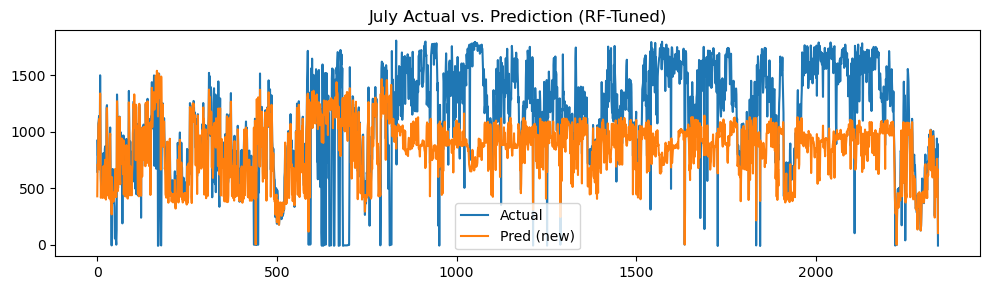

In [78]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,3))
plt.plot(y_test.reset_index(drop=True)[:2341], label="Actual")
plt.plot(tuned_model.predict(X_test)[:2341], label="Pred (new)")
plt.legend(); plt.title("July Actual vs. Prediction (RF-Tuned)"); plt.tight_layout(); plt.show()

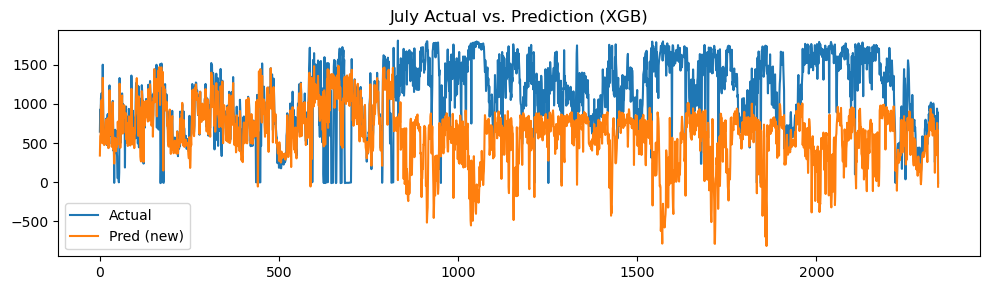

In [79]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,3))
plt.plot(y_test.reset_index(drop=True)[:2341], label="Actual")
plt.plot(xgb_model.predict(X_test)[:2341], label="Pred (new)")
plt.legend(); plt.title("July Actual vs. Prediction (XGB)"); plt.tight_layout(); plt.show()

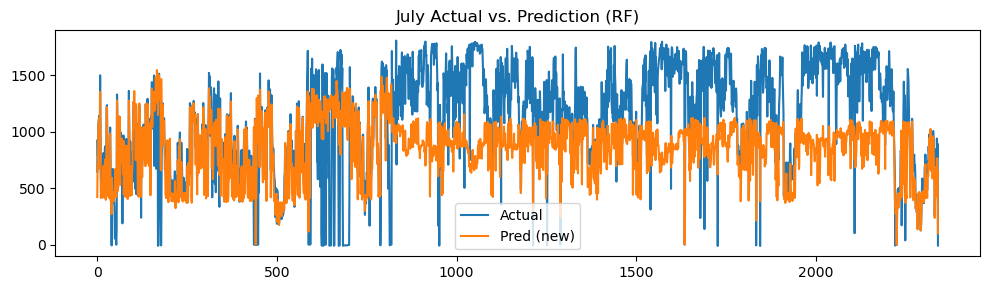

In [81]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,3))
plt.plot(y_test.reset_index(drop=True)[:2341], label="Actual")
plt.plot(rf_model.predict(X_test)[:2341], label="Pred (new)")
plt.legend(); plt.title("July Actual vs. Prediction (RF)"); plt.tight_layout(); plt.show()

In [76]:
# ------------------------------------------------------------
# Evaluation metrics for every fitted model on the July hold-out
# ------------------------------------------------------------
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

models = {
    #"Ridge" : ridge_base,          # comment out if not defined
    "RF"    : rf_model,
    "XGB"   : xgb_model if has_xgb else None,
    "Tree-GS": tuned_model,        # grid-searched best (RF or XGB)
    #"Stack" : stack                # comment out if not built
}

rows = []
for name, mdl in models.items():
    if mdl is None:
        continue
    y_hat = mdl.predict(X_test)
    rows.append({
        "Model": name,
        "RMSE (kW)": rmse(y_test, y_hat),
        "MAE  (kW)": mean_absolute_error(y_test, y_hat),
        "MAPE (%)":  mape(y_test, y_hat),
        "R²":        r2_score(y_test, y_hat)
    })

results = pd.DataFrame(rows).set_index("Model")\
            .sort_values("RMSE (kW)")
print(results.round(2))

         RMSE (kW)  MAE  (kW)  MAPE (%)    R²
Model                                        
Tree-GS     475.94     350.97       inf -0.13
RF          477.08     351.51       inf -0.14
XGB         800.28     572.56       inf -2.20


In [82]:
# ------------------------------------------------------------
# XGBoost hyper-parameter tuning with RandomizedSearchCV
# ------------------------------------------------------------
from xgboost                    import XGBRegressor
from sklearn.model_selection    import RandomizedSearchCV
from sklearn.metrics            import make_scorer, mean_squared_error
import numpy as np
import pandas as pd

# ---- Scorer: *negative* RMSE so "larger is better" for scikit
def neg_rmse(y_true, y_pred):
    return -np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(neg_rmse, greater_is_better=True)

# ---- Search space
param_dist = {
    "est__n_estimators"      : np.arange(300, 1201, 100),      # 300 … 1200
    "est__max_depth"         : np.arange(2, 9),                # 2 … 8
    "est__learning_rate"     : np.linspace(0.02, 0.2, 10),     # η
    "est__subsample"         : np.linspace(0.6, 1.0, 5),       # bagging
    "est__colsample_bytree"  : np.linspace(0.6, 1.0, 5),       # feature bagging
    "est__min_child_weight"  : [1, 3, 5, 7, 10],               # leaf min-hess
    "est__gamma"             : [0, 0.1, 0.3, 0.5],             # min loss-reduction
}

# ---- Base estimator
xgb_base = XGBRegressor(
    tree_method="hist",
    objective="reg:squarederror",
    random_state=42,
    n_jobs=-1
)

# ---- Pipeline: scaler + XGB
from sklearn.pipeline import Pipeline
xgb_pipe = Pipeline([
    ("prep", preproc),        # StandardScaler for all numeric cols
    ("est",  xgb_base)
])

# ---- Randomized search
SEARCH_ITERS = 50           # 50 draws → good compromise CPU vs coverage
rs = RandomizedSearchCV(
        xgb_pipe,
        param_distributions=param_dist,
        n_iter=SEARCH_ITERS,
        scoring=rmse_scorer,
        cv=tscv,             # your expanding window split
        verbose=2,
        n_jobs=-1,
        random_state=42
)

print("Running RandomizedSearchCV …")
rs.fit(X_train, y_train)

print("\nBest CV (negative) RMSE:", rs.best_score_)
print("Best params:")
for k, v in rs.best_params_.items():
    print(f"  {k}: {v}")

# ---- Evaluate on July hold-out
best_xgb = rs.best_estimator_
y_pred   = best_xgb.predict(X_test)

rmse  = np.sqrt(mean_squared_error(y_test, y_pred))
mae   = np.mean(np.abs(y_test - y_pred))
mape  = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
from sklearn.metrics import r2_score
r2    = r2_score(y_test, y_pred)

print(f"\nJuly hold-out metrics for tuned XGB:")
print(f"  RMSE  = {rmse:,.2f} kW")
print(f"  MAE   = {mae:,.2f} kW")
print(f"  MAPE  = {mape:,.2f} %")
print(f"  R²    = {r2:.3f}")

Running RandomizedSearchCV …
Fitting 4 folds for each of 50 candidates, totalling 200 fits
[CV] END est__colsample_bytree=0.7, est__gamma=0.3, est__learning_rate=0.2, est__max_depth=6, est__min_child_weight=10, est__n_estimators=400, est__subsample=0.9; total time=   2.7s
[CV] END est__colsample_bytree=0.7, est__gamma=0.3, est__learning_rate=0.2, est__max_depth=6, est__min_child_weight=10, est__n_estimators=400, est__subsample=0.9; total time=   2.8s
[CV] END est__colsample_bytree=0.7, est__gamma=0.3, est__learning_rate=0.2, est__max_depth=6, est__min_child_weight=10, est__n_estimators=400, est__subsample=0.9; total time=   2.8s
[CV] END est__colsample_bytree=0.7, est__gamma=0.3, est__learning_rate=0.2, est__max_depth=6, est__min_child_weight=10, est__n_estimators=400, est__subsample=0.9; total time=   2.9s
[CV] END est__colsample_bytree=0.7, est__gamma=0.5, est__learning_rate=0.12000000000000002, est__max_depth=4, est__min_child_weight=7, est__n_estimators=900, est__subsample=0.8; tot

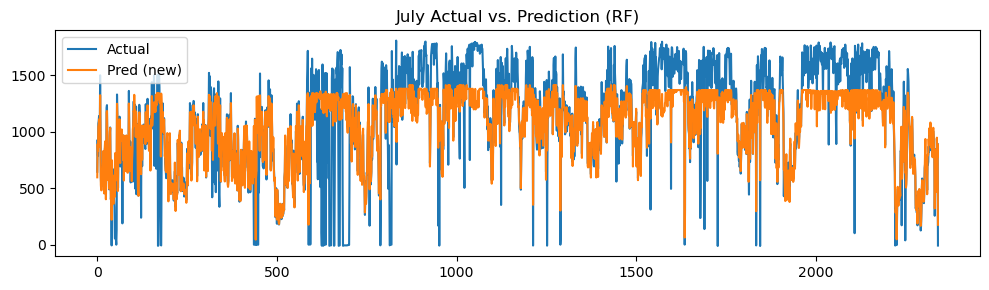

In [83]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,3))
plt.plot(y_test.reset_index(drop=True)[:2341], label="Actual")
plt.plot(best_xgb.predict(X_test)[:2341], label="Pred (new)")
plt.legend(); plt.title("July Actual vs. Prediction (RF)"); plt.tight_layout(); plt.show()

In [85]:
# ------------------------------------------------------------
# Random-Forest hyper-parameter tuning (RandomizedSearchCV)
# ------------------------------------------------------------
from sklearn.ensemble      import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# ---- RF search space
rf_param_dist = {
    "est__n_estimators"     : np.arange(300, 1501, 100),   # 300 … 1500
    "est__max_depth"        : np.append(None, np.arange(5, 31, 5)),
    "est__min_samples_leaf" : [1, 2, 5, 10, 20, 50],
    "est__min_samples_split": [2, 5, 10],
    "est__max_features"     : ["sqrt", "log2", 0.5, 0.8, 1.0],
    "est__bootstrap"        : [True, False],
}

rf_base = RandomForestRegressor(
    random_state=42,
    n_jobs=-1
)

rf_pipe = Pipeline([
    ("prep", preproc),
    ("est",  rf_base)
])

RF_SEARCH_ITERS = 60      # raise to 100+ if you have time/cores

rf_rs = RandomizedSearchCV(
    rf_pipe,
    param_distributions=rf_param_dist,
    n_iter=RF_SEARCH_ITERS,
    scoring=rmse_scorer,       # uses negative RMSE defined earlier
    cv=tscv,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

print("Running RandomizedSearchCV for Random-Forest …")
rf_rs.fit(X_train, y_train)

print("\nBest RF CV (negative) RMSE:", rf_rs.best_score_)
print("Best RF params:")
for k, v in rf_rs.best_params_.items():
    print(f"  {k}: {v}")

# ---- Evaluate tuned RF on July hold-out
best_rf = rf_rs.best_estimator_
y_hat   = best_rf.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
rmse_rf   = np.sqrt(mean_squared_error(y_test, y_hat))
mae_rf    = mean_absolute_error(y_test, y_hat)
mape_rf   = np.mean(np.abs((y_test - y_hat) / y_test)) * 100
r2_rf     = r2_score(y_test, y_hat)

print(f"\nJuly hold-out metrics for tuned RF:")
print(f"  RMSE  = {rmse_rf:,.2f} kW")
print(f"  MAE   = {mae_rf:,.2f} kW")
print(f"  MAPE  = {mape_rf:,.2f} %")
print(f"  R²    = {r2_rf:.3f}")

Running RandomizedSearchCV for Random-Forest …
Fitting 4 folds for each of 60 candidates, totalling 240 fits


python(14048) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14049) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14050) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14051) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14052) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14053) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14054) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14055) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[CV] END est__bootstrap=True, est__max_depth=30, est__max_features=log2, est__min_samples_leaf=1, est__min_samples_split=5, est__n_estimators=600; total time=  34.4s
[CV] END est__bootstrap=True, est__max_depth=30, est__max_features=log2, est__min_samples_leaf=1, est__min_samples_split=5, est__n_estimators=600; total time=  37.0s
[CV] END est__bootstrap=True, est__max_depth=30, est__max_features=log2, est__min_samples_leaf=1, est__min_samples_split=5, est__n_estimators=600; total time=  38.7s
[CV] END est__bootstrap=True, est__max_depth=30, est__max_features=log2, est__min_samples_leaf=1, est__min_samples_split=5, est__n_estimators=600; total time=  41.8s
[CV] END est__bootstrap=False, est__max_depth=30, est__max_features=0.5, est__min_samples_leaf=10, est__min_samples_split=2, est__n_estimators=300; total time=  43.0s
[CV] END est__bootstrap=False, est__max_depth=30, est__max_features=0.5, est__min_samples_leaf=10, est__min_samples_split=2, est__n_estimators=300; total time=  46.3s
[C

KeyboardInterrupt: 